# Vehicle Ranking Scraper for Carbuzz.com

This site contains data about vehicles along with its ratings in certain aspects like design, reliablity, safety, which can be useful when analyzed. This can then help buyers choose their desired automobile, and manufacturers to see potential improvements to their models, enhancing consumer experience.

The group chose this site because this site offers detailed and up-to-date information on a wide range of vehicles, including specifications, reviews, and pricing, making it a valuable source for automotive data. This can then be used to provide insights into market trends, pricing dynamics, and consumer preferences, aiding in market analysis and decision-making for car manufacturers and dealers.

Colab Link: https://colab.research.google.com/drive/1a0J5APMnk_F3c8o7RSpowhZCM1pJG0xI?usp=sharing

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import re
import numpy as np

In [ ]:
#type in URL, so code can be reused among different subsites.
#Example: https://carbuzz.com/cars/best-mpg-suvs
url = input("Enter CarbuzzRanking link: ")

#request code from the server using the link given
data = requests.get(url)

#feed the request into the sooop
soup = BeautifulSoup(data.text, 'html.parser')

#select container for the tables
cars = soup.find_all('div', class_='bg-block bg-car-preview-block bg-group-car-preview js-bg-block')
#cars should be an array of the container of each cars



#initialize lists
car_brand = []
car_model = []
car_price = []
car_mpgcity = []
car_mpghiway = []
car_hp = []
car_scorebuzz = []
car_scoredesign = []
car_scoreperformance = []
car_scorempg = []
car_scoreinterior = []
car_scoreinfotainment = []
car_scorereliability = []
car_scoresafety = []
car_scorevalue = []
#get the type of car from soup
car_type = soup.find('li', class_='breadcrumb-item active')
car_type = car_type.text

for car in cars: #in every car//

    #find model
    model = car.find('a', class_='bg-group-car-preview__name')

    #find container for each values, because class_='sub-model-preview-field__val' is reused
    pricecontainer = car.find('div', class_='sub-model-preview-field sub-model-preview-field_price')
    price = pricecontainer.find('div', class_='sub-model-preview-field__val')

    #repeat///
    mpgcontainer = car.find('div', class_='sub-model-preview-field sub-model-preview-field_mpg')
    mpg = mpgcontainer.find('div', class_='sub-model-preview-field__val')

    hpcontainer = car.find('div', class_='sub-model-preview-field sub-model-preview-field_horsepower')
    hp = hpcontainer.find('div', class_='sub-model-preview-field__val')

    buzzscore = car.find('span', class_='buzzscore-radial-progress__value absolute-middle')

    designratingcontainer = car.find('div', {'data-score-field-key': 'ExteriorDesign'})
    design = designratingcontainer.find('div', class_="bg-group-car-preview-score-field__value")

    performancecontainer = car.find('div', {'data-score-field-key': 'Performance'})
    performance = performancecontainer.find('div', class_="bg-group-car-preview-score-field__value")

    economycontainer = car.find('div', {'data-score-field-key': 'FuelEconomy'})
    economy = economycontainer.find('div', class_="bg-group-car-preview-score-field__value")

    interiorcontainer = car.find('div', {'data-score-field-key': 'Interior'})
    interior = interiorcontainer.find('div', class_="bg-group-car-preview-score-field__value")

    infotainmentcontainer = car.find('div', {'data-score-field-key': 'Infotainment'})
    infotainment = infotainmentcontainer.find('div', class_="bg-group-car-preview-score-field__value")

    reliabilitycontainer = car.find('div', {'data-score-field-key': 'Reliability'})
    reliability = reliabilitycontainer.find('div', class_="bg-group-car-preview-score-field__value")

    safetycontainer = car.find('div', {'data-score-field-key': 'Safety'})
    safety = safetycontainer.find('div', class_="bg-group-car-preview-score-field__value")

    valuecontainer = car.find('div', {'data-score-field-key': 'Value'})
    value = valuecontainer.find('div', class_="bg-group-car-preview-score-field__value")


    #add separator for brand and model from car_model
    brand = model.text.split(' ', 1)

    #separate two values in mpg, set default as 0
    mpgextracted = re.findall(r'\d+', mpg.text)
    if not mpgextracted:
        mpgextracted = [np.nan, np.nan]

    #Get the starting price, and remove $ and ,
    pricemin = price.text.split(' ', 1)
    pricemin_cleansed = pricemin[0].replace("$", "").replace(",", "")
    if pricemin_cleansed == 'TBC':
        pricemin_cleansed = np.nan

    hp_cleansed = hp.text.replace(" hp", "" ).replace(",", "")
    if hp_cleansed == 'TBC':
        hp_cleansed = np.nan

    #feed the acquired values into lists as text(.text)
    car_brand.append(brand[0])
    car_model.append(model.text)
    car_price.append(pricemin_cleansed)
    car_mpgcity.append(mpgextracted[0])
    car_mpghiway.append(mpgextracted[1])
    car_hp.append(hp_cleansed)
    car_scorebuzz.append(buzzscore.text)
    car_scoredesign.append(design.text)
    car_scoreperformance.append(performance.text)
    car_scorempg.append(economy.text)
    car_scoreinterior.append(interior.text)
    car_scoreinfotainment.append(infotainment.text)
    car_scorereliability.append(reliability.text)
    car_scoresafety.append(safety.text)
    car_scorevalue.append(value.text)


#create dataframe
df = pd.DataFrame({'Brand': car_brand, 'Model': car_model, 'Price$': car_price, 'CityMPG': car_mpgcity,
                   'HiWayMPG': car_mpghiway, 'HorsePower': car_hp, 'BuzzScore': car_scorebuzz,
                   'Design': car_scoredesign, 'Performance': car_scoreperformance,
                   'Mileage': car_scorempg, 'Interior': car_scoreinterior,
                   'Infotainment': car_scoreinfotainment, 'Reliability': car_scorereliability,
                   'Safety': car_scoresafety, 'Value': car_scorevalue,
                   'Type' : car_type})


#Cleaning to replace all N/A with NaN.
df.replace('N/A', np.nan, inplace=True)


#save the file as car_type
filename = car_type + '.csv'

#save to subfolder CSVS
file_path = os.path.join('CSVS', filename)

df.to_csv(file_path)

Enter CarbuzzRanking link: https://carbuzz.com/cars/best-mpg-suvs


# This part is for compiling all the tables(csv) saved

You can feed it as much csv files as you like.

In [ ]:
folder_path = 'CSVS'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


In [ ]:
combined_data = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(folder_path, file)

    try:
        data = pd.read_csv(file_path)
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file}: {e}")


In [ ]:
combined_data.to_csv('combined_data.csv', index=False)

In [ ]:
combined_data.shape

(793, 17)

# Removing the Duplicates...

  Using Models as reference, we get the redundant data and remove it from the dataframe

In [ ]:
#run if u already have the compiled csv

#combined_data = pd.read_csv('clean_data.csv')

In [ ]:
duplicates = combined_data[combined_data.duplicated(subset=['Model'], keep=False)]

In [ ]:
duplicates

,Unnamed: 0,Brand,Model,Price$,CityMPG,HiWayMPG,HorsePower,BuzzScore,Design,Performance,Mileage,Interior,Infotainment,Reliability,Safety,Value,Type
0,0,Porsche,Porsche Taycan,90900.0,78.0,81.0,429.0,9.4,10.0,10.0,9.0,9.0,9.0,10.0,10.0,8.0,Sport Sedans
1,1,Porsche,Porsche Taycan Turbo,153300.0,81.0,80.0,616.0,9.4,10.0,10.0,9.0,10.0,9.0,10.0,10.0,7.0,Sport Sedans
2,2,Honda,Honda Civic Si Sedan,28800.0,27.0,37.0,200.0,9.3,9.0,9.0,8.0,10.0,9.0,9.0,10.0,10.0,Sport Sedans
3,3,Mercedes-AMG,Mercedes-AMG CLA 45,57800.0,20.0,28.0,382.0,9.1,10.0,10.0,8.0,10.0,10.0,7.0,10.0,8.0,Sport Sedans
4,4,Audi,Audi e-tron GT,104900.0,81.0,83.0,469.0,9.1,9.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,Sport Sedans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,45,Chevrolet,Chevrolet Tahoe,52600.0,15.0,20.0,355.0,8.6,8.0,8.0,7.0,9.0,10.0,10.0,9.0,8.0,SUVs With Best MPG
789,46,BMW,BMW X5,65200.0,23.0,27.0,375.0,8.6,8.0,9.0,7.0,9.0,10.0,8.0,10.0,8.0,SUVs With Best MPG
790,47,BMW,BMW X6,73900.0,23.0,26.0,375.0,8.6,8.0,9.0,8.0,9.0,10.0,8.0,10.0,7.0,SUVs With Best MPG
791,48,BMW,BMW X5 M,108900.0,13.0,18.0,600.0,8.6,9.0,10.0,6.0,9.0,10.0,8.0,9.0,8.0,SUVs With Best MPG


In [ ]:
clean_data = combined_data.drop_duplicates(subset = ['Model'])

In [ ]:
print('old: ', combined_data.shape, '\nnew: ', clean_data.shape)

old:  (793, 17) 
new:  (304, 17)


In [ ]:
clean_data.to_csv('clean_data.csv', index = False)
dframe = pd.DataFrame()


# Modeling phase

Since the previous steps involved cleansing, we can then proceed to visualization of data.


In [ ]:
dframe = clean_data

import seaborn as sns
from scipy.stats import zscore
dframe

,Unnamed: 0,Brand,Model,Price$,CityMPG,HiWayMPG,HorsePower,BuzzScore,Design,Performance,Mileage,Interior,Infotainment,Reliability,Safety,Value,Type
0,0,Porsche,Porsche Taycan,90900.0,78.0,81.0,429.0,9.4,10.0,10.0,9.0,9.0,9.0,10.0,10.0,8.0,Sport Sedans
1,1,Porsche,Porsche Taycan Turbo,153300.0,81.0,80.0,616.0,9.4,10.0,10.0,9.0,10.0,9.0,10.0,10.0,7.0,Sport Sedans
2,2,Honda,Honda Civic Si Sedan,28800.0,27.0,37.0,200.0,9.3,9.0,9.0,8.0,10.0,9.0,9.0,10.0,10.0,Sport Sedans
3,3,Mercedes-AMG,Mercedes-AMG CLA 45,57800.0,20.0,28.0,382.0,9.1,10.0,10.0,8.0,10.0,10.0,7.0,10.0,8.0,Sport Sedans
4,4,Audi,Audi e-tron GT,104900.0,81.0,83.0,469.0,9.1,9.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,Sport Sedans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,14,BMW,BMW 4 Series Gran Coupe,48300.0,25.0,34.0,255.0,7.8,7.0,8.0,7.0,7.0,8.0,8.0,9.0,8.0,Four-Door Coupes
300,15,Mercedes-AMG,Mercedes-AMG CLS 63,108900.0,16.0,22.0,550.0,NaN,8.0,10.0,6.0,8.0,7.0,8.0,8.0,7.0,Four-Door Coupes
301,16,BMW,BMW Alpina B6,124400.0,17.0,25.0,591.0,NaN,10.0,9.0,6.0,8.0,8.0,8.0,8.0,6.0,Four-Door Coupes
302,17,BMW,BMW M6 Gran Coupe,119900.0,14.0,20.0,560.0,NaN,10.0,10.0,6.0,8.0,8.0,8.0,8.0,6.0,Four-Door Coupes


In [ ]:
#dframe.loc[:, 'HorsePower'] = dframe['HorsePower'].str.replace(',', '', regex=False)

<Axes: xlabel='BuzzScore', ylabel='Price$'>

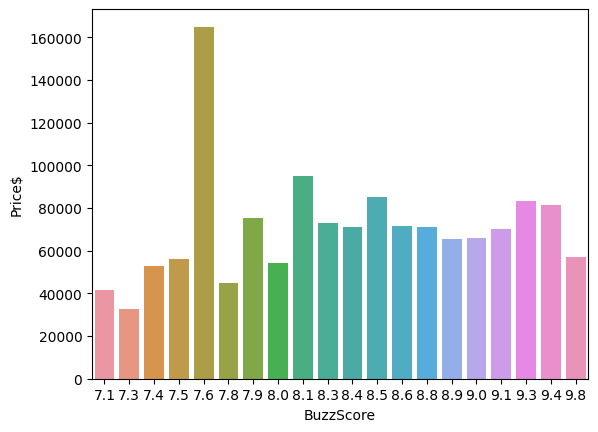

In [ ]:
#Average Price of each BuzzScore
BuzzScore_avg = dframe.groupby('BuzzScore')['Price$'].mean().reset_index()
sns.barplot(x='BuzzScore', y='Price$', data=BuzzScore_avg)

In [ ]:
# Displaying the Top 10 Brands
BrandThatHasLots = dframe['Brand'].head(10)
BrandThatHasLots

0         Porsche
1         Porsche
2           Honda
3    Mercedes-AMG
4            Audi
5            Audi
6    Mercedes-AMG
7           Acura
8             BMW
9      Volkswagen
Name: Brand, dtype: object

<Axes: xlabel='Brand', ylabel='Price$'>

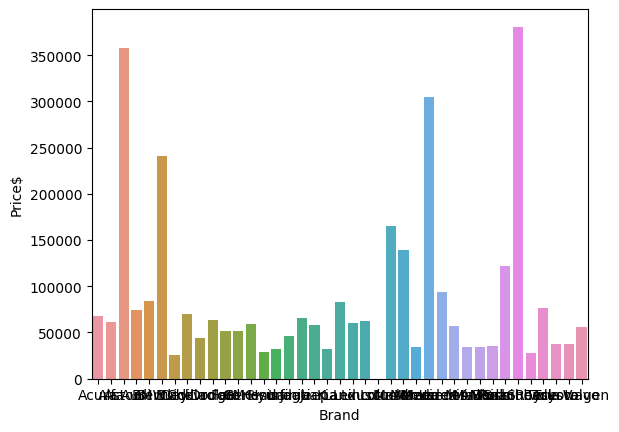

In [ ]:
# Average price of vehicles for different brands
brand_avg = dframe.groupby('Brand')['Price$'].mean().reset_index()
sns.barplot(x='Brand', y='Price$', data=brand_avg)

The bar plot displays the average price of vehicles for different brands.

<Axes: xlabel='Brand', ylabel='Price$'>

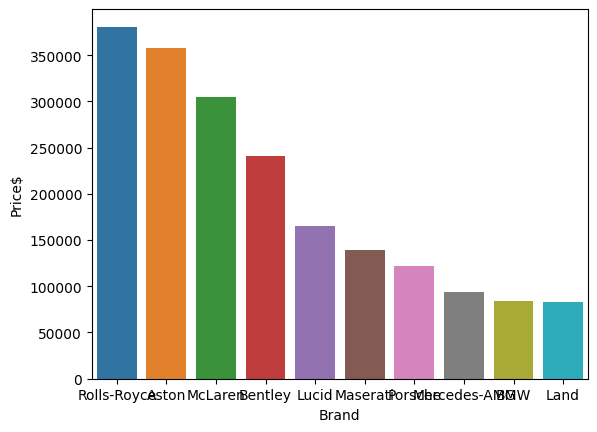

In [ ]:
top_10_brands = brand_avg.nlargest(10, 'Price$')
sns.barplot(x='Brand', y='Price$', data=top_10_brands)

The bar plot displays the top 10 brands with the highest average prices of vehicles.

In [ ]:
dframe['HorsePower'] = dframe['HorsePower'].astype(float)
dframe['HorsePower'].dtypes


<ipython-input-27-9eae6fc31586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe['HorsePower'] = dframe['HorsePower'].astype(float)


dtype('float64')

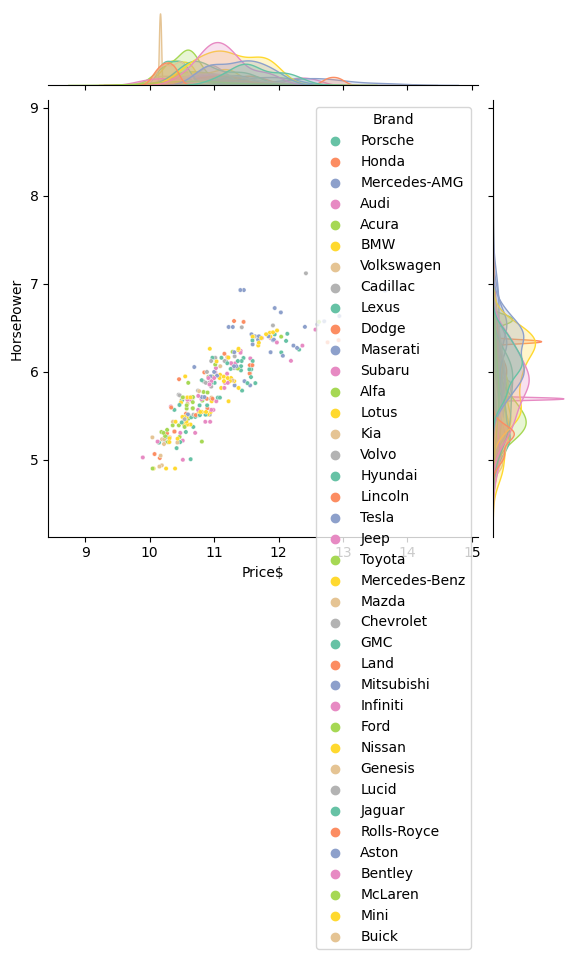

In [ ]:
#Normalized_HorsePower = (dframe['HorsePower'] - np.mean(dframe['HorsePower']))/np.std(dframe['HorsePower'])
#Normalized_Price = (dframe['Price$'] - np.mean(dframe['Price$']))/np.std(dframe['Price$'])

Normalized_Price = np.log(dframe['Price$'])
Normalized_Hp = np.log(dframe['HorsePower'])

sns.jointplot(data = dframe, x=Normalized_Price, y=Normalized_Hp, palette='Set2', hue = 'Brand', s=10, ratio = 5)

The joint plot visualizes the relationship between the logarithms of 'Price$' and 'HorsePower' for different car brands. This visualization explores how different car prices and horespower are related to other different brands.

#Hypothesis

After exploring the data, a hypothesis has been formed that the brand of the vehicle has more impact on the price of the vehicle than the BuzzScore or popularity.

In [ ]:
#feature selection
dframe

,Unnamed: 0,Brand,Model,Price$,CityMPG,HiWayMPG,HorsePower,BuzzScore,Design,Performance,Mileage,Interior,Infotainment,Reliability,Safety,Value,Type
0,0,Porsche,Porsche Taycan,90900.0,78.0,81.0,429.0,9.4,10.0,10.0,9.0,9.0,9.0,10.0,10.0,8.0,Sport Sedans
1,1,Porsche,Porsche Taycan Turbo,153300.0,81.0,80.0,616.0,9.4,10.0,10.0,9.0,10.0,9.0,10.0,10.0,7.0,Sport Sedans
2,2,Honda,Honda Civic Si Sedan,28800.0,27.0,37.0,200.0,9.3,9.0,9.0,8.0,10.0,9.0,9.0,10.0,10.0,Sport Sedans
3,3,Mercedes-AMG,Mercedes-AMG CLA 45,57800.0,20.0,28.0,382.0,9.1,10.0,10.0,8.0,10.0,10.0,7.0,10.0,8.0,Sport Sedans
4,4,Audi,Audi e-tron GT,104900.0,81.0,83.0,469.0,9.1,9.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,Sport Sedans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,14,BMW,BMW 4 Series Gran Coupe,48300.0,25.0,34.0,255.0,7.8,7.0,8.0,7.0,7.0,8.0,8.0,9.0,8.0,Four-Door Coupes
300,15,Mercedes-AMG,Mercedes-AMG CLS 63,108900.0,16.0,22.0,550.0,NaN,8.0,10.0,6.0,8.0,7.0,8.0,8.0,7.0,Four-Door Coupes
301,16,BMW,BMW Alpina B6,124400.0,17.0,25.0,591.0,NaN,10.0,9.0,6.0,8.0,8.0,8.0,8.0,6.0,Four-Door Coupes
302,17,BMW,BMW M6 Gran Coupe,119900.0,14.0,20.0,560.0,NaN,10.0,10.0,6.0,8.0,8.0,8.0,8.0,6.0,Four-Door Coupes


# Preprocessing the Dataframe
In this section, we focus on data preprocessing and model preparation for building a predictive model. The data has been cleaned and preprocessed to handle missing values and encode categorical features.

In [ ]:
#processing numerical data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
dframe_copy = dframe.copy()
dframe_copy = dframe_copy.dropna()
#Scaler is used so the numerical data can be processed/normalized
scaler = StandardScaler()

#list of columns with numerical data
numericals = [ 'Price$', 'CityMPG', 'HiWayMPG', 'HorsePower', 'BuzzScore', 'Design',
             'Performance', 'Mileage', 'Interior', 'Infotainment', 'Reliability',
             'Safety', 'Value']

#Scaling all the numerical data using z = (x - u) / s(standard score)
dframe_copy[numericals] = scaler.fit_transform(dframe_copy[numericals])


#Processing categoricals (Brand and Type)

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(dframe_copy)
label_encoder = LabelEncoder()

#Encoding brand
encoded_data = label_encoder.fit_transform(dframe_copy['Brand'])
dframe_copy['Encoded_Brand'] = encoded_data

encoded_data = label_encoder.fit_transform(dframe_copy['Type'])
dframe_copy['Encoded_Type'] = encoded_data

dframe_copy1 = dframe_copy


In [ ]:

dframe_copy

,Unnamed: 0,Brand,Model,Price$,CityMPG,HiWayMPG,HorsePower,BuzzScore,Design,Performance,Mileage,Interior,Infotainment,Reliability,Safety,Value,Type,Encoded_Brand,Encoded_Type
0,0,Porsche,Porsche Taycan,0.396075,2.184459,2.498177,0.421987,1.843557,1.368975,1.446336,1.043737,0.289183,-0.004410,1.575400,1.053841,-0.404881,Sport Sedans,30,9
1,1,Porsche,Porsche Taycan Turbo,1.601846,2.316473,2.445437,1.544424,1.843557,1.368975,1.446336,1.043737,1.343590,-0.004410,1.575400,1.053841,-1.495300,Sport Sedans,30,9
2,2,Honda,Honda Civic Si Sedan,-0.803900,-0.059787,0.177583,-0.952548,1.614682,0.335704,0.532252,0.163432,1.343590,-0.004410,0.505573,1.053841,1.775957,Sport Sedans,13,9
3,3,Mercedes-AMG,Mercedes-AMG CLA 45,-0.243525,-0.367821,-0.297084,0.139877,1.156931,1.368975,1.446336,0.163432,1.343590,1.040668,-1.634083,1.053841,-0.404881,Sport Sedans,25,9
4,4,Audi,Audi e-tron GT,0.666600,2.316473,2.603659,0.662080,1.156931,0.335704,1.446336,0.163432,0.289183,-0.004410,0.505573,1.053841,0.685538,Sport Sedans,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,32,Subaru,Subaru Impreza Sedan,-0.977906,-0.235806,-0.138862,-1.240660,-1.589573,-2.764109,-2.210001,0.163432,-1.819630,-1.049487,1.575400,1.053841,-0.404881,Most Reliable Sedans,32,7
296,0,BMW,BMW 8 Series Gran Coupe,0.330376,-0.323816,-0.244343,-0.142233,1.614682,1.368975,0.532252,-0.716873,1.343590,1.040668,0.505573,1.053841,0.685538,Four-Door Coupes,4,2
297,6,Audi,Audi S5 Sportback,-0.282172,-0.323816,-0.191603,-0.058200,-0.216321,0.335704,-0.381833,0.163432,0.289183,-0.004410,-0.564255,-0.129857,-0.404881,Four-Door Coupes,3,2
298,8,Audi,Audi A5 Sportback,-0.498592,-0.191802,-0.033380,-0.946546,-0.445196,0.335704,-1.295917,0.163432,0.289183,-0.004410,-0.564255,-0.129857,-0.404881,Four-Door Coupes,3,2


In [ ]:
#Splitting data BUZZSCORE VERSION
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

#selecting features(BuzzScoreonly[as individual])
feature = dframe_copy.drop(['Price$', 'Brand', 'HorsePower',
                            'Encoded_Brand', 'Encoded_Type',
                            'Type', 'Model', 'Unnamed: 0',
                            'Design' ,'Performance', 'Mileage',
                            'Interior', 'Infotainment','Reliability'
                            ,'Safety', 'CityMPG', 'HiWayMPG' ], axis=1)
#selecting target
target = dframe_copy['Price$']


#splitting data
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size =0.2, random_state = 1)

#data preprocessing to keep cohesion among data types
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)
XTrain_BuzzScore = X_train

In this part of the code, we prepared the data for training a machine learning model. It involves choosing relevant features, separating the data into training and testing subsets, and ensuring that the data is in a format suitable for modeling, including converting the target variable to a numerical format where necessary.

## Random Forest Classifier

The group used Random Forest Classifiers as they are less likely to make inaccurate predictions. The group also used R2 Score to evaluate the model's performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint



classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_transformed)
y_pred = classifier.predict(X_test)
r2score_BuzzScore = r2_score(y_test, y_pred)

This code prepares the dataset to be analyzed with a machine learning model by encoding the target variable and selecting the appropriate features for training and testing.

In [ ]:
#Splitting data with brand
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

#selecting features(Brand only and value)
feature = dframe_copy.drop(['Price$', 'Brand', 'HorsePower',
                            'BuzzScore', 'Encoded_Type',
                            'Type', 'Model', 'Unnamed: 0',
                            'Design' ,'Performance', 'Mileage',
                            'Interior', 'Infotainment','Reliability'
                            ,'Safety', 'CityMPG', 'HiWayMPG' ], axis=1)
#selecting target
target = dframe_copy['Price$']


#splitting data
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size =0.2, random_state = 1)

#A bit of preprocessing for a smoother modeling process
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)
XTrain_Brand = X_train

This code was used to train a Random Forest Classifier using the provided training data (X_train, y_transformed), predict on the test data (X_test), and evaluate the classifier's performance using the R2 score (r2score_Brand). The R2 score assesses how effectively the model captures the variance in the target variable based on the features, providing useful information about the Random Forest model's predictive power in this context.

In [ ]:
#Using Random forest,
classifier = RandomForestClassifier(max_depth=2, random_state=0)

#Load training data into random forest
classifier.fit(X_train, y_transformed)
y_pred = classifier.predict(X_test)

#Compare predicted and test data
r2score_Brand = r2_score(y_test, y_pred)

This code is required for building, training, and assessing the linear regression model's ability to predict "Design Rating" based on two features: "Value" and "Encoded_Brand."

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math


# Predicting design ratings

# Select features (X) and the target (y)
dframe.dropna(inplace=True)
X = dframe_copy[['Value', 'Encoded_Brand']]
y = dframe_copy['Price$']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for Design Rating: {rmse}')

#To calculate the MSE or Mean Squared Error between y_test and y_pred
mse = mean_squared_error(y_test, y_pred)

#To calculate the R-Squared Score between the actual values in y_test and predicted values in y_pred
r2_Brand = r2_score(y_test, y_pred)

#To print the MSE and R2 Score values
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2_Brand)



RMSE for Design Rating: 1.0373279075450377
Mean Squared Error (MSE):  1.0760491877717662
R-squared (R2) Score:  -0.02247932860495383


<ipython-input-36-94d6a1cc0e52>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe.dropna(inplace=True)


This code calculates car design ratings based on other features in the dataset. This prediction is made using linear regression. This code determines how effectively a linear regression model predicts design ratings based on the features chosen ('Value' and 'BuzzScore'). The RMSE, MSE, and R2 scores provide information about the model's effectiveness and ability to explain design rating variance.

In [ ]:
# Predicting design ratings

# Select features (X) and the target (y)
dframe.dropna(inplace=True)
X = dframe_copy[['Value', 'BuzzScore']]
y = dframe_copy['Price$']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for Design Rating: {rmse}')

#To calculate the MSE or Mean Squared Error between y_test and y_pred
mse = mean_squared_error(y_test, y_pred)

#To calculate the R-Squared Score between the actual values in y_test and predicted values in y_pred
r2_BuzzScore = r2_score(y_test, y_pred)

#To print the MSE and R2 Score values
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2_BuzzScore)

RMSE for Design Rating: 1.0240095111990084
Mean Squared Error (MSE):  1.0485954790260323
R-squared (R2) Score:  0.0036076291336433197


<ipython-input-37-9ef3cd310168>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe.dropna(inplace=True)


In [ ]:
# Printing the Training Set on BuzzScore and Brand
print("Training set on BuzzScore \n", XTrain_BuzzScore,
      "\nTraining set on Brand \n ", XTrain_Brand)

Training set on BuzzScore 
      BuzzScore     Value
0     1.843557 -0.404881
180   1.156931  0.685538
87   -0.674072  0.685538
129  -1.131823 -1.495300
175   0.470305  0.685538
..         ...       ...
165   0.012554 -1.495300
86   -0.674072 -0.404881
168   0.928056  0.685538
298  -0.445196 -0.404881
39   -1.818449 -0.404881

[189 rows x 2 columns] 
Training set on Brand 
          Value  Encoded_Brand
0   -0.404881             30
180  0.685538             25
87   0.685538             11
129 -1.495300             34
175  0.685538              8
..        ...            ...
165 -1.495300              4
86  -0.404881             10
168  0.685538             24
298 -0.404881              3
39  -0.404881              1

[189 rows x 2 columns]


In [ ]:
# Printing the Linear Regression and Random Forest Classifier on both BuzzScore and Brand
print('Linear Regression on Brand: ', r2_Brand,
      '\nLinear Regression on BuzzScore: ',r2_BuzzScore,
      '\nRandomForest on Brand: ', r2score_Brand,
      '\nRandomForest on BuzzScore:', r2score_BuzzScore)
#We can plot this

Linear Regression on Brand:  -0.02247932860495383 
Linear Regression on BuzzScore:  0.0036076291336433197 
RandomForest on Brand:  -16.15023881893183 
RandomForest on BuzzScore: -31.82142857142857


This code generates a bar plot that displays the normalized R2 scores of various machine learning models applied to two features or variables, namely 'Brand' and 'BuzzScore.' The code is used to compare and visualize the performance of various machine learning models by normalizing their R2 scores.  The resulting graphic provides a clear visual comparison of the performance of the models.

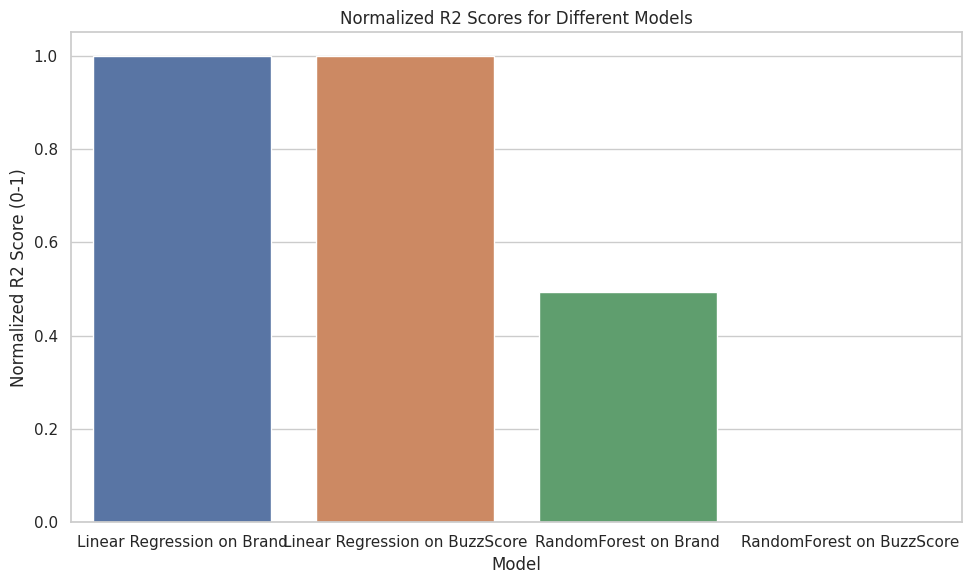

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


r2_scores = [r2_Brand, r2_BuzzScore, r2score_Brand, r2score_BuzzScore]
scaler = MinMaxScaler()
normalized_r2_scores = scaler.fit_transform(np.array(r2_scores).reshape(-1, 1))


labels = ['Linear Regression on Brand', 'Linear Regression on BuzzScore', 'RandomForest on Brand', 'RandomForest on BuzzScore']
scores = [r2_Brand, r2_BuzzScore, r2score_Brand, r2score_BuzzScore]

results = pd.DataFrame({
    'Model': ['Linear Regression on Brand', 'Linear Regression on BuzzScore', 'RandomForest on Brand', 'RandomForest on BuzzScore'],
    'Normalized R2 Score': normalized_r2_scores.flatten()
})

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Model", y="Normalized R2 Score", data=results)  # Rotate the x-axis labels for better readability
plt.ylabel('Normalized R2 Score (0-1)')
plt.title('Normalized R2 Scores for Different Models')

# Display the plot
plt.tight_layout()
plt.show()


# Conclusion

The students analyzed the data about vehicles and its features such as its design, reliability, and safety. To know more about the patterns in the data, the group collected information in the CarBuzz site which offers detailed and up-to-date information on a wide range of vehicles, including specifications, reviews, and pricing, making it a valuable source for automotive data. The group used Random Forest Classifier and R2 Score to evaluate the performance of the model as well as making accurate predictions. After exploring the data, a hypothesis has been formed that the brand of the vehicle has more impact on the price of the vehicle than the BuzzScore or popularity. The RMSE and MSE values provides the prediction of the accuracy with having a lower value being better. The negative R2 Score means that the data does not fit well with the model meaning there was still room for improvement. While having the Random Forest values having a very negative score means that it is a poor fit to the data.